# Tugas Praktikum

## Tugas

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

### 1. Gunakan data 'Mall_Customers.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


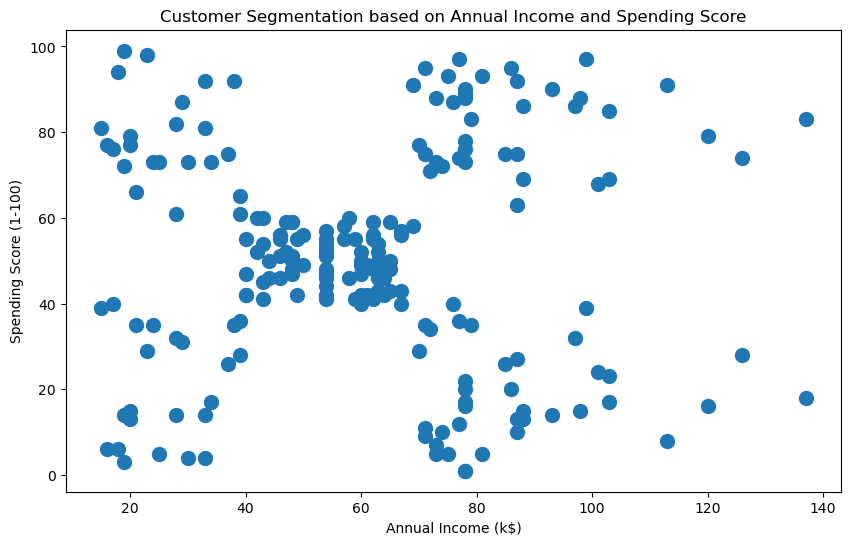

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)  # 's' set to 100 for all data points
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.show()

### 3. Membuat model K-Means dengan mempertimbangkan jumlah yang terbaik

/Users/dhayuintan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhayuintan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhayuintan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhayuintan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

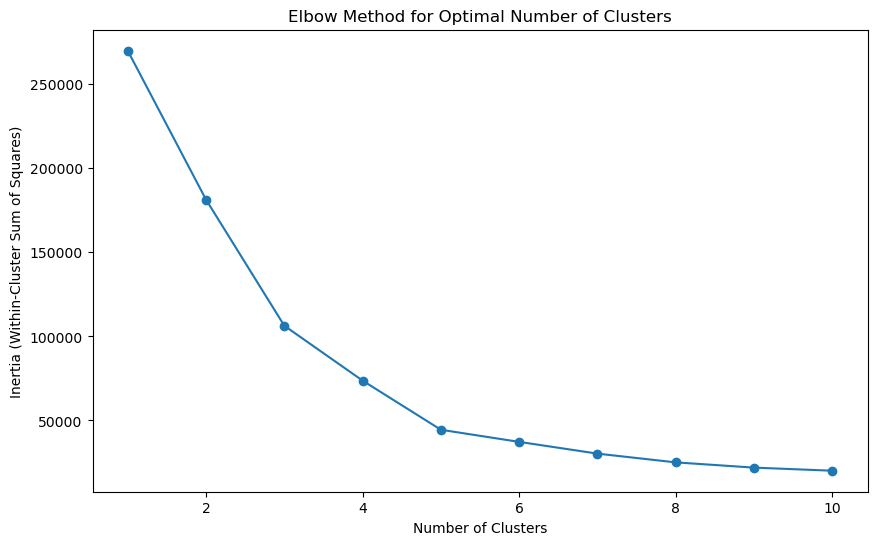

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the "elbow" method
inertia = []
max_clusters = 10  # You can adjust this based on your preferences

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the "elbow" graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Berdasarkan kode diatas dapat ditentukan jumlah cluster yang optimal adalah 5 karena pada titik tersebut penurunan inertia (sum of squared distances within clusters) mulai melambat secara signifikan.

/Users/dhayuintan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


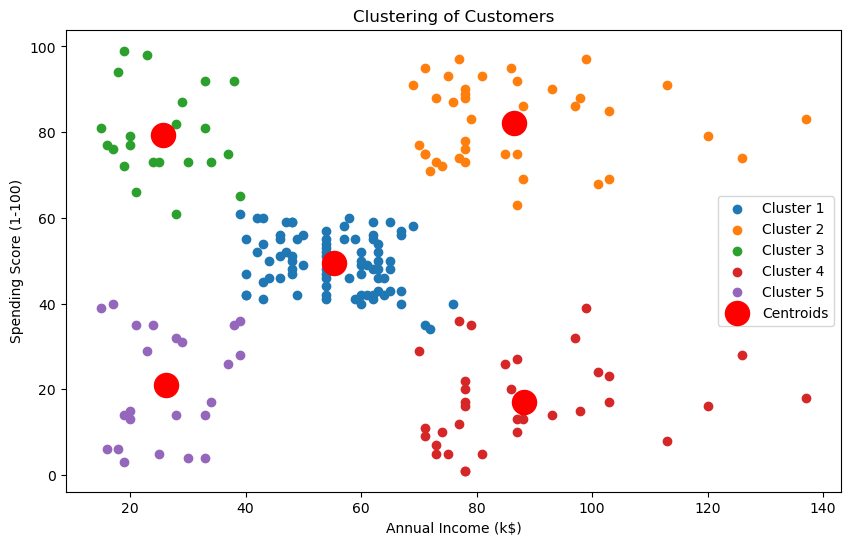

In [7]:
optimal_num_clusters = 5

# Create and fit the KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans_optimal.fit(X)

# Get the labels for each data point
cluster_labels = kmeans_optimal.labels_

# Visualize the clustered data
plt.figure(figsize=(10, 6))
for i in range(optimal_num_clusters):
    cluster_data = X[cluster_labels == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.legend()
plt.show()

Berdasarkan gambar, terdapat 5 kelompok (klaster) berbeda dari data berdasarkan fitur 'Annual Income (k$)' dan 'Spending Score (1-100)'.
1. Cluster 1 merupakan  kelompok dengan tingkat pengeluaran menengah (Spending Score menengah) dan pendapatan tahunan menengah. Mereka merupakan kelompok yang seimbang antara pendapatan dan pengeluaran.
2. Cluster 2 adalah kelompok dengan tingkat pengeluaran tertinggi (Spending Score tinggi) dan pendapatan tahunan tinggi.
3. Cluster 3 adalah kelompok dengan tingkat pengeluaran tinggi (Spending Score tinggi) dan pendapatan tahunan rendah. 
4. Cluster 4 adalah kelompok dengan tingkat pengeluaran rendah (Spending Score rendah) dan pendapatan tahunan tinggi. Mereka memiliki pendapatan tinggi namun cenderung hemat dalam pengeluaran.
5. Cluster 5 merupakan  kelompok dengan tingkat pengeluaran terendah (Spending Score rendah) dan pendapatan tahunan terendah.

### 4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [8]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [10]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [11]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [12]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [13]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [14]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [15]:
# Load citra rose_pink
Rose_path = "../img/rose_pink.png"
Rose = io.imread(Rose_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

(-0.5, 499.5, 749.5, -0.5)

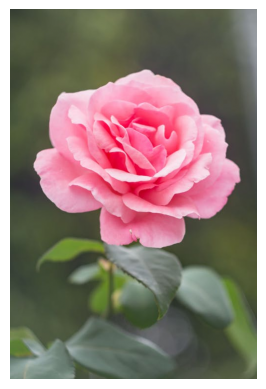

In [17]:
plt.imshow(Rose)
plt.axis('off')

In [18]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Rose, num_epochs, initial_learning_rate, initial_neighborhood_radius)

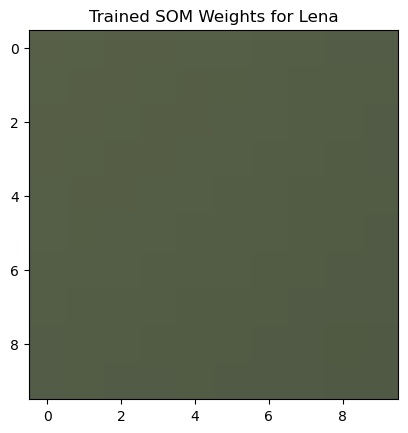

In [19]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()